Instalacion de Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el dataset ya preaplicado ETL

In [19]:
df = pd.read_parquet('../data/movies_etl.parquet')
df.head()

,collection_name,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,genre_name1,genre_name0,companie_name,country,spoken
0,Toy Story Collection,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,12.451801,Comedy,Animation,Pixar Animation Studios,United States of America,English
1,None,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,4.043035,Fantasy,Adventure,TriStar Pictures,United States of America,English
2,Grumpy Old Men Collection,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995.0,NaN,Comedy,Romance,Warner Bros.,United States of America,English
3,None,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,5.090760,Drama,Comedy,Twentieth Century Fox Film Corporation,United States of America,English
4,Father of the Bride Collection,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995.0,inf,None,Comedy,Sandollar Productions,United States of America,English


    Preparacion y limpieza de datos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, 0 to 45461
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   collection_name    4488 non-null   object        
 1   budget             45368 non-null  float64       
 2   id                 45368 non-null  object        
 3   original_language  45357 non-null  object        
 4   overview           44427 non-null  object        
 5   popularity         45368 non-null  float64       
 6   release_date       45368 non-null  datetime64[ns]
 7   revenue            45368 non-null  float64       
 8   runtime            45122 non-null  float64       
 9   title              45368 non-null  object        
 10  vote_average       45368 non-null  float64       
 11  vote_count         45368 non-null  float64       
 12  release_year       45368 non-null  float64       
 13  return             10911 non-null  float64       
 14  genre_name1

**_Nos revela que contiene 45466 entradas y 19 columnas_**

## Manejo de valores NAN

In [21]:
df.isnull().sum()

collection_name      40978
budget                  98
id                      98
original_language      109
overview              1039
popularity              98
release_date            98
revenue                 98
runtime                344
title                   98
vote_average            98
vote_count              98
release_year            98
return               34555
genre_name1          17026
genre_name0           2482
companie_name        11891
country               6308
spoken                3866
dtype: int64

**_Se puede observar que la columna Title y Overview contienen valores Null, procedemos a eliminar esas filas del dataframe_**

In [22]:
df = df.dropna(subset=['title'])
df = df.dropna(subset=['overview'])

Comprobamos

In [23]:
df['title'].isnull().sum()

np.int64(0)

In [24]:
df['overview'].isnull().sum()

np.int64(0)

## Analisis

# Peliculas pertenecientes a una coleccion

In [25]:
# Count the number of None values in the 'collection_name' column
none_count = df['collection_name'].isnull().sum()

# Count the number of non-None values in the 'collection_name' column
not_none_count = df['collection_name'].notnull().sum()

print(f"Number of None values: {none_count}")
print(f"Number of non-None values: {not_none_count}")

Number of None values: 40020
Number of non-None values: 4407


In [26]:
len(df)

44427

In [38]:
no_coleccion = df['collection_name'].isnull().sum()
coleccion = df['collection_name'].notnull().sum()

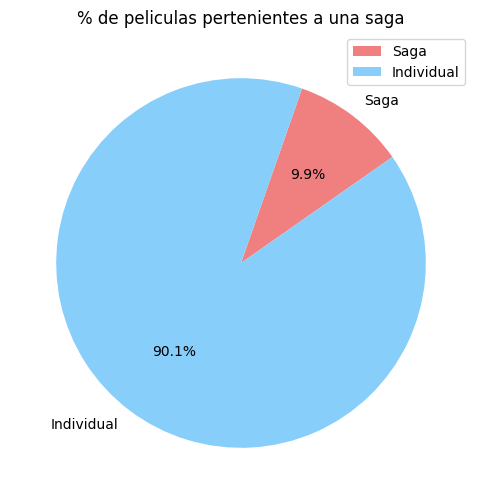

In [226]:
plt.figure(figsize=(12,6))
plt.title("% de peliculas pertenientes a una saga")
plt.pie([coleccion,no_coleccion],labels = ['Saga', 'Individual'], colors = ['lightcoral', 'lightskyblue'], autopct='%1.1f%%' ,startangle=35)
plt.legend()
plt.show()

**_Se puede observar que del orden de un 10% del dataframe contiene peliculas que pertecen a una colecion de peliculas_**

# Costo de los Films


filtramos a mano los valores de budget a fin de acotar los resultados

In [130]:
budget_filtrada = df[(df['budget'] > 100000) & (df['budget'] < 5000000)]

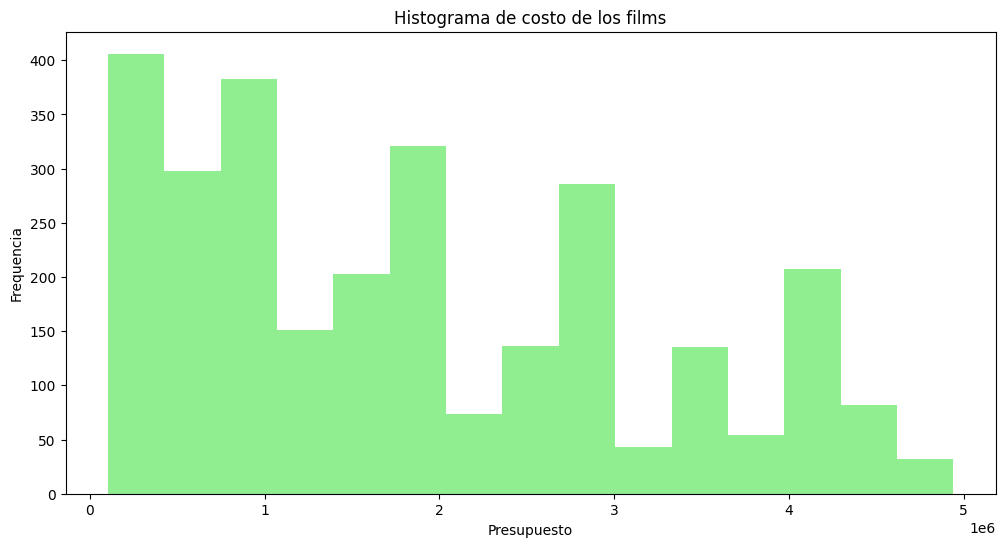

In [229]:
plt.figure(figsize=(12,6))
plt.hist(budget_filtrada['budget'], bins=15 , color = "lightgreen") 
plt.xlabel('Presupuesto')
plt.ylabel('Frequencia')
plt.title('Histograma de costo de los films')
plt.show()

**_Podemos notar que la mayoria de los films se concentran por debajo de los 3 millones_**

# Lenguaje original

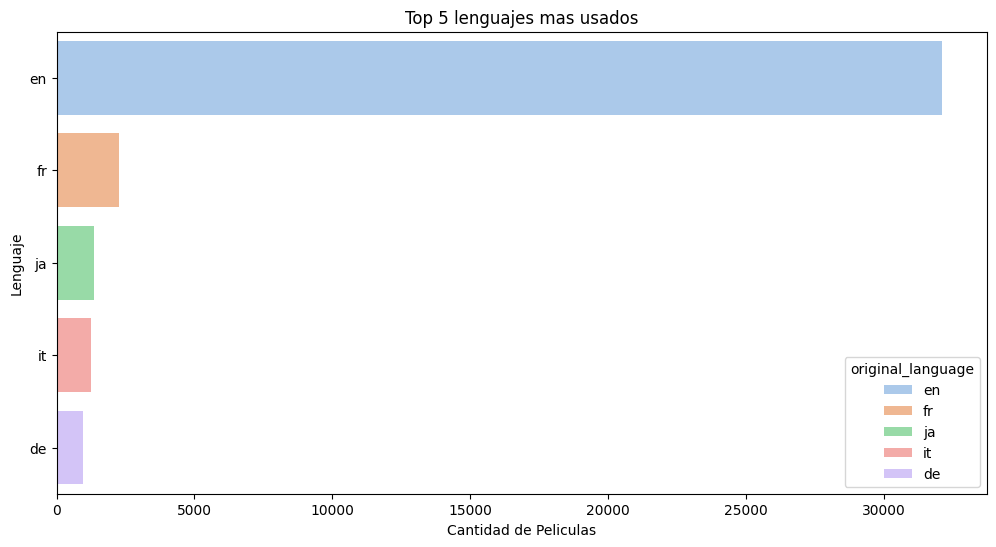

In [162]:
plt.figure(figsize=(12,6))
sns.countplot(y = df['original_language'],  hue = df['original_language'], hue_order = df['original_language'].value_counts().index[:5], palette= "pastel", order=df['original_language'].value_counts().index[:5])
plt.title('Top 5 lenguajes mas usados')
plt.xlabel('Cantidad de Peliculas')
plt.ylabel('Lenguaje')
plt.show()

**_Se puede observar que de los 5 lenguajes mas usados en el primer lugar figura el ingles, seguido por frances y japones_**

# Analisis de filmes lanzados por año

- Genero un dataframe con la cuenta de filmes por año, ordeno y grafico

In [219]:
lanzamiento = df['release_year'].value_counts().to_frame().reset_index()
lanzamiento

,release_year,count
0,2014.0,1915
1,2015.0,1856
2,2013.0,1851
3,2012.0,1681
4,2011.0,1634
...,...,...
130,2020.0,1
131,1887.0,1
132,1878.0,1
133,1874.0,1


In [220]:
lanza_ordenado = lanzamiento.sort_values(by='release_year')


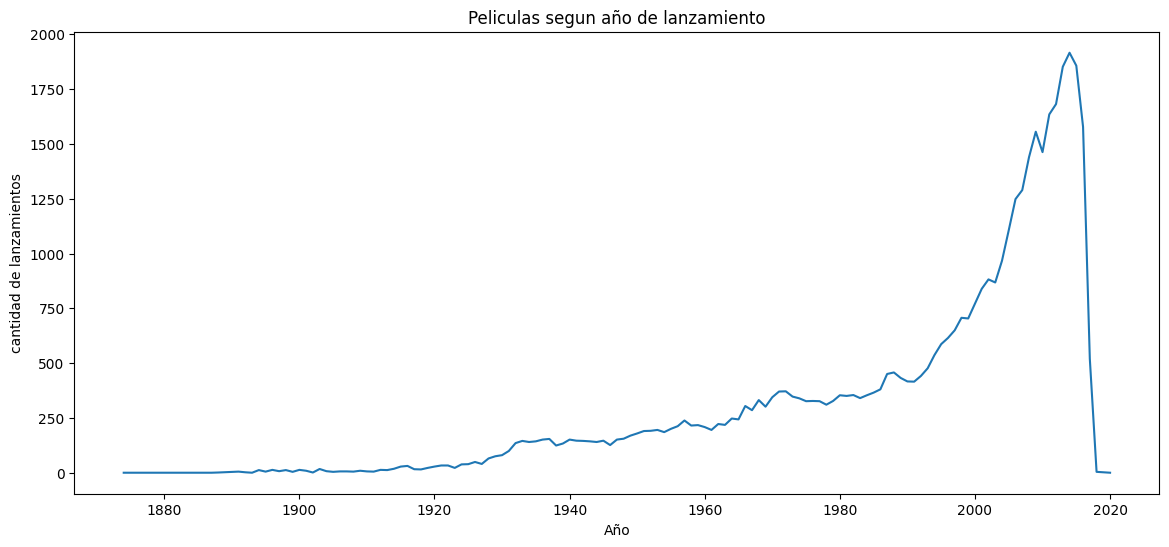

In [221]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=lanza_ordenado, x='release_year', y='count')
#ax.set_xticks(lanza_ordenado['release_year'], )
plt.title("Peliculas segun año de lanzamiento")
plt.ylabel("cantidad de lanzamientos")
plt.xlabel("Año")
plt.show()

**_Se puede notar que la tendencia de peliculas estrenadas los ultimos años va en aumento_**

# Analisis de los generos aparecidos

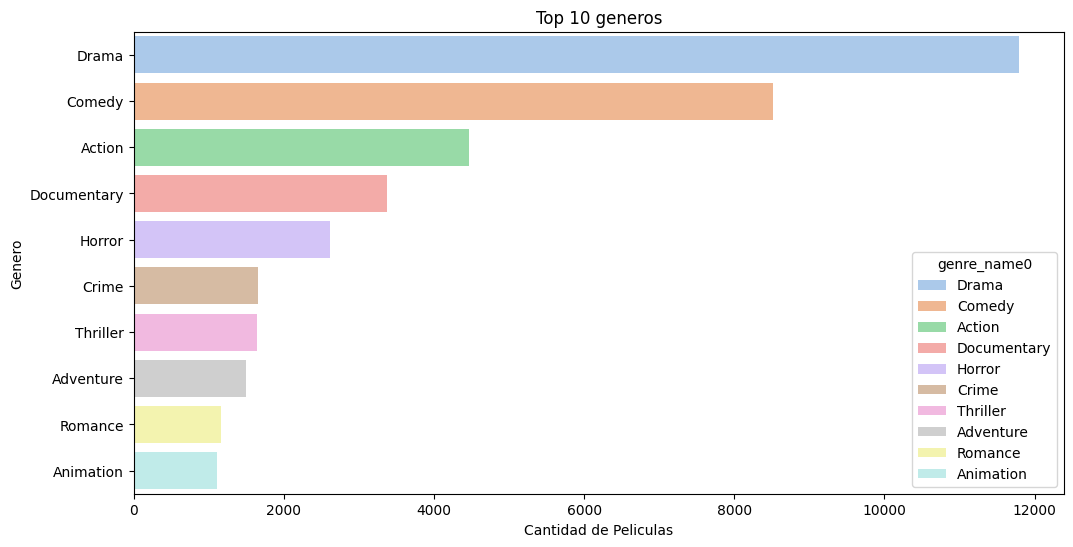

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y = df['genre_name0'],  hue = df['genre_name0'], hue_order = df['genre_name0'].value_counts().index[:10], palette= "pastel", order=df['genre_name0'].value_counts().index[:10])
plt.title('Top 10 generos')
plt.xlabel('Cantidad de Peliculas')
plt.ylabel('Genero')
plt.show()

**_Se puede observar que de los 10 generos mas usados en el primer lugar figura el drama, seguido por comedia y acción_**

# Correlacion entre costo y promedio de voto

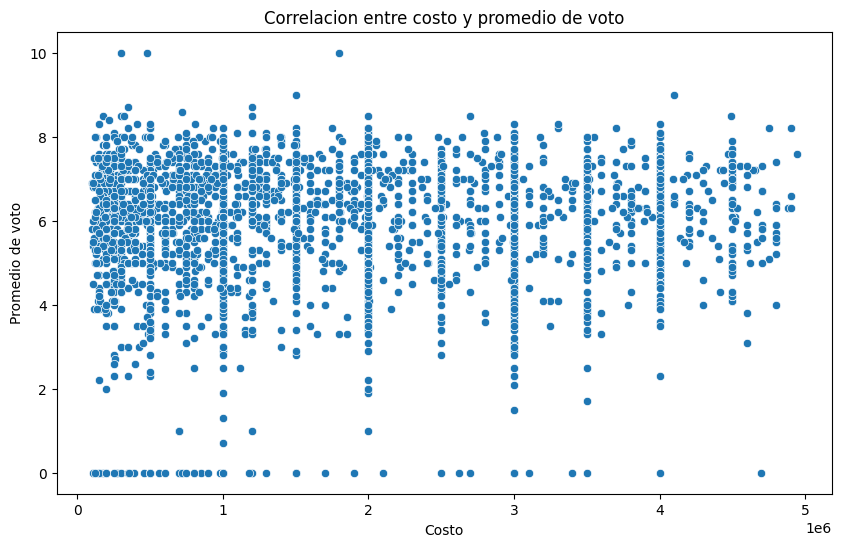

In [233]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='vote_average', data=budget_filtrada)
plt.title('Correlacion entre costo y promedio de voto')
plt.xlabel('Costo')
plt.ylabel('Promedio de voto')
plt.show()

**_No se puede observar una correlacion fuerte entre costo y promedio de voto, negando lo que intuitivamente se podria pensar que entre mas presupuesto mayor puntaje, ni viceversa_** 

# Analisis de evolucion de la duración de las peliculas

Se calcula el promedio de la duracion por año

In [275]:
runtime_by_year = df.groupby('release_year')['runtime'].mean()

In [276]:
dfry = pd.DataFrame(runtime_by_year)

In [277]:
dfry

,runtime
release_year,
1874.0,1.000000
1878.0,1.000000
1883.0,1.000000
1887.0,1.000000
1888.0,1.000000
...,...
2015.0,93.168642
2016.0,94.276474
2017.0,94.107692


In [278]:
dfry = dfry.sort_values(by= 'release_year')

Se filtra el dataset para facilidad en el grafico

In [281]:
dfry = dfry[(dfry.index > 1918) & (dfry.index < 2018)]

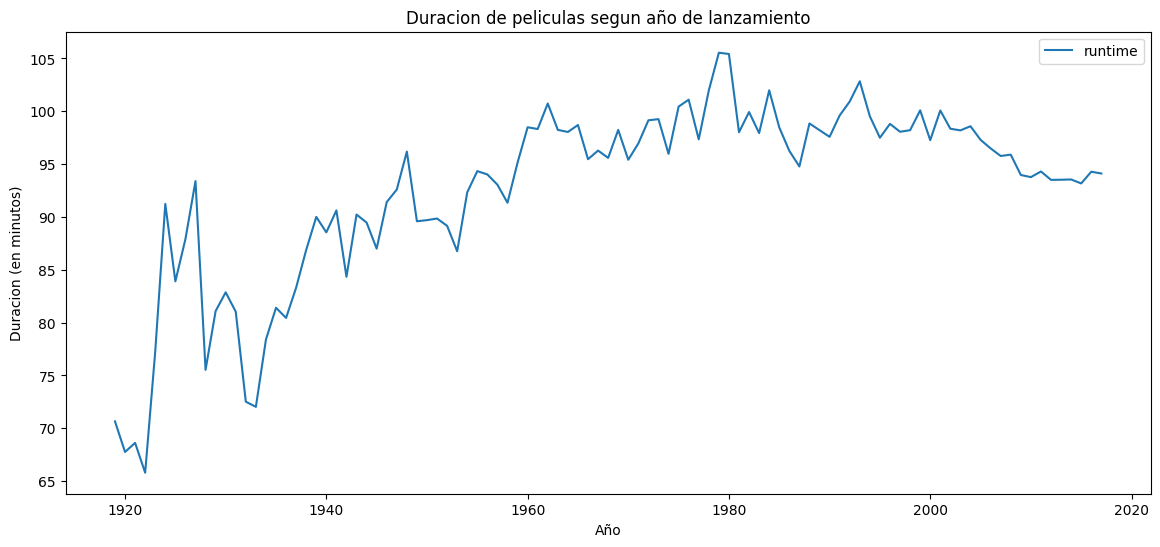

In [284]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=dfry )
#ax.set_xticks(lanza_ordenado['release_year'], )
plt.title("Duracion de peliculas segun año de lanzamiento")
plt.ylabel("Duracion (en minutos)")
plt.xlabel("Año")
plt.show()

**_Se visualiza una clara tendencia de realizar peliculas de mayor duracion hasta aproximadamente 1960, luego de ahi se estabiliza quedando en un rango promedio de 95 minutos_**